In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

years=range(1880,2011)
pieces=[]
columns=['name','sex','births']

for year in years:
    relative_path=r'F:\pyc\PyCharm\GitHub\reptiles_gh\Machine Learning\python for DA\DATA\ch02\names\yob%d.txt'  % year
    frame=pd.read_csv(relative_path,names=columns)
    frame['year']=year
    pieces.append(frame)
    
names=pd.concat(pieces,ignore_index=True)

透视图显示年份及性别
###Matrix Test 
$\left[\begin{matrix}1&2&3\\2&3&4\\6&7&8\\\end{matrix}\right]$

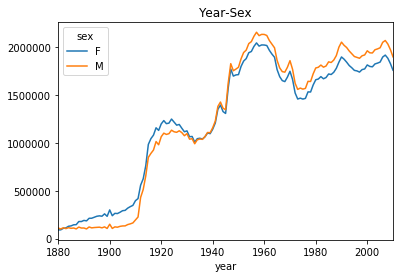

In [17]:
def plt_year_sex():
    year_sex=names.pivot_table(values='births',columns=['sex'],index=['year'],aggfunc=np.sum)
    year_sex.plot(title='Year-Sex')
    plt.show()

plt_year_sex()

In [18]:
def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births/births.sum()  #births.sum()是对按year,sex分组后的小组内求和
    return group

names=names.groupby(['year','sex']).apply(add_prop)  #得到1880年name1 Female人数占 1880年 Female总人数的比例
check=np.allclose(names.groupby(['year','sex']).prop.sum(),1)